# ## What is Magic Functions?
In Jupyternotebook, the magic functions are pre-defined functions(“magics”).  Using 'magics allows us to executes supplied commands. 

There are two kinds of magics line-oriented and cell-oriented prefaced with % and %% respectively.
https://www.dummies.com/programming/python/common-jupyter-notebook-magic-functions/

In [1]:
%load_ext sql
%sql sqlite:///data/oulad.db3

## Now it's time to start working with tables and CSV files in unison. There are a few steps to this process, so go slowly and try to understand what each code block is doing.
We are going to drop any existing tables. We could institute this logic also in our create table. You might sometimes see this as
`CREATE TABLE IF NOT EXISTS`
For this exercise we will be efficient and clean up after ourselves!


In [2]:
%%sql 
select * from sqlite_master where type='table'

 * sqlite:///data/oulad.db3
Done.


type,name,tbl_name,rootpage,sql
table,assessments,assessments,2,"CREATE TABLE assessments( code_module TEXT, code_presentation TEXT, id_assessment INTEGER, assessment_type TEXT, date INT, weight INT)"
table,courses,courses,5,"CREATE TABLE courses( code_module TEXT, code_presentation TEXT, module_presentation_length INTEGER)"


In [9]:
%%sql
DROP TABLE assessments

 * sqlite:///data/oulad.db3
Done.


[]

In [10]:
%%sql 
select * from sqlite_master where type='table'

 * sqlite:///data/oulad.db3
Done.


type,name,tbl_name,rootpage,sql
table,courses,courses,5,"CREATE TABLE courses( code_module TEXT, code_presentation TEXT, module_presentation_length INTEGER)"


## We first need to create our structure for the table. 
You can look at the CSV file (or just the headings) to get a sense of the data. These data types will be given to you for this first exercise, but you will have to create the structures for the other tables yourself.

In [11]:
%%sql sqlite://
    CREATE TABLE assessments(
    code_module TEXT,
    code_presentation TEXT,
    id_assessment INTEGER,
    assessment_type TEXT,
    date INT,
    weight INT
);

Done.


[]

In [12]:
# let's empty our tables first, incase we already have values there.
%sql DELETE FROM assessments;

 * sqlite:///data/oulad.db3
0 rows affected.


[]

## Now the next cell might look a little intimidating, but don't panic just yet!

We are using a couple of external libraries to help us. OS to handle the path and file that we are interacting with and CSV to deal with the structure of our comma separated values.

Our aim here is to iterate through these values in order to populate the table structure that we just created with data.

Our for loop performs some checks so as not to produce invalid data types or 'null' data.

I have also left a bit of an inefficient solution to the problem with 6 fields defined as variables. Can you optimise this bit of code? Hint: it's more iteration!

Finally, this code block inserts the corresponding values from our assessments.csv into our assessments table. We have gone from CSV to Python, to SQL. Our final step is to close our CSV reader!

In [13]:
import os
import csv 

fin    = open(os.path.join("data","assessments.csv"), "rt") # you might need to change rt/rd to match representations
csv_in = csv.reader(fin)
next(csv_in);
for line  in csv_in:
    # Empty, non-string values in the CSV should be changed to the SQL Keyword DEFAULT
    if line[2] == "": line[2] = "DEFAULT"
    if line[4] == "": line[4] = "DEFAULT"
    if line[5] == "": line[5] = "DEFAULT"
    # We will do this verbose so that you can see how each variable is passed. You will want to optimise this, however.
    field1 = line[0]
    field2 = line[1]
    field3 = line[2]
    field4 = line[3]
    field5 = line[4]
    field6 = line[5]
    %sql INSERT INTO assessments (code_module, code_presentation, id_assessment, assessment_type, date, weight) VALUES (:field1, :field2, :field3, :field4, :field5, :field6);
fin.close()

 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:

1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.
 * sqlite:///data/oulad.db3
1 rows affected.


## Let's do a final check
We will query the table to ensure that we have some data. Check this against your CSV file and see if it matches. Are the data types valid for this representation?

In [14]:

sqlres = %sql SELECT * from assessments;
sqlres


 * sqlite:///data/oulad.db3
Done.


code_module,code_presentation,id_assessment,assessment_type,date,weight
AAA,2013J,1752,TMA,19,10
AAA,2013J,1753,TMA,54,20
AAA,2013J,1754,TMA,117,20
AAA,2013J,1755,TMA,166,20
AAA,2013J,1756,TMA,215,30
AAA,2013J,1757,Exam,DEFAULT,100
AAA,2014J,1758,TMA,19,10
AAA,2014J,1759,TMA,54,20
AAA,2014J,1760,TMA,117,20
AAA,2014J,1761,TMA,166,20


### Let's peek (new)


In [15]:
allrows =  %sql select * from assessments

 * sqlite:///data/oulad.db3
Done.


In [16]:
type(allrows)

sql.run.ResultSet

In [17]:
allrows.field_names

['code_module',
 'code_presentation',
 'id_assessment',
 'assessment_type',
 'date',
 'weight']

In [18]:
%sql sqlite:///alldatabases.db

In [19]:
%%sql 
select * from sqlite_master where type='table'

 * sqlite:///alldatabases.db
   sqlite:///data/oulad.db3
Done.


type,name,tbl_name,rootpage,sql
table,Project,Project,4,"CREATE TABLE Project ( project_id integer PRIMARY KEY, project_name text NOT NULL, project_begin_date date, project_end_date date )"
table,Task,Task,5,"CREATE TABLE Task ( id integer PRIMARY KEY, name text NOT NULL, priority integer, status_id integer NOT NULL, project_id integer NOT NULL, begin_date text NOT NULL, end_date text NOT NULL, FOREIGN KEY (project_id) REFERENCES projects (id) )"
table,Employee,Employee,3,"CREATE TABLE Employee(Employee_id int auto_increment primary key,Employee_first_name varchar(500) NOT null,Employee_last_name varchar(500) NOT null,Employee_Address varchar(1000),Employee_emailID varchar(500),Employee_department_ID int default 9,Employee_Joining_date date)"
table,Employeeaaas,Employeeaaas,6,"CREATE TABLE Employeeaaas(Employee_id int auto_increment primary key,Employee_first_name varchar(500) NOT null,Employee_last_name varchar(500) NOT null,Employee_Address varchar(1000),Employee_emailID varchar(500),Employee_department_ID int default 9,Employee_Joining_date date)"
table,Employddeeaaas,Employddeeaaas,8,"CREATE TABLE Employddeeaaas(Employee_id int auto_increment primary key,Employee_first_name varchar(500) NOT null,Employee_last_name varchar(500) NOT null,Employee_Address varchar(1000),Employee_emailID varchar(500),Employee_department_ID int default 9,Employee_Joining_date date)"
table,Employdddeeaaas,Employdddeeaaas,10,"CREATE TABLE Employdddeeaaas(Employee_id int auto_increment primary key,Employee_first_name varchar(500) NOT null,Employee_last_name varchar(500) NOT null,Employee_Address varchar(1000),Employee_emailID varchar(500),Employee_department_ID int default 9,Employee_Joining_date date)"
table,Inventory,Inventory,12,"CREATE TABLE Inventory(Employee_id int auto_increment primary key,Employee_first_name varchar(500) NOT null,Employee_last_name varchar(500) NOT null,Employee_Address varchar(1000),Employee_emailID varchar(500),Employee_department_ID int default 9,Employee_Joining_date date)"
table,Classroom,Classroom,14,"CREATE TABLE Classroom(Employee_id int auto_increment primary key,Employee_first_name varchar(500) NOT null,Employee_last_name varchar(500) NOT null,Employee_Address varchar(1000),Employee_emailID varchar(500),Employee_department_ID int default 9,Employee_Joining_date date)"
table,Course,Course,16,"CREATE TABLE Course(Employee_id int auto_increment primary key,Employee_first_name varchar(500) NOT null,Employee_last_name varchar(500) NOT null,Employee_Address varchar(1000),Employee_emailID varchar(500),Employee_department_ID int default 9,Employee_Joining_date date)"
table,Teacher,Teacher,18,"CREATE TABLE Teacher(Employee_id int auto_increment primary key,Employee_first_name varchar(500) NOT null,Employee_last_name varchar(500) NOT null,Employee_Address varchar(1000),Employee_emailID varchar(500),Employee_department_ID int default 9,Employee_Joining_date date)"


## We have reached the end of the demonstration section. Now it's your turn!
See if you can create the structure for the other tables and populate the tables with the values from the CSV files using Python. Be warned, not all data types are obvious! We have some boolean types, some date representations and other challenging data types to map.

If you find this easy then feel free to go ahead and try to take the exercise further. For example you could:
- Produce summary statistics for the columns using COUNT, AVG, SUM etc.
- Create some small visualisations of the data. We cover plotting later on in the course, so this might be a nice precursor to exploring tools like Matplotlib.
- If you really want to explore more deeply you might want to look at some advanced SQL functions, for instance by  combining multiple queries using JOINS or UNIONS.

In [20]:
%%sql sqlite://
    CREATE TABLE courses(
    code_module TEXT,
    code_presentation TEXT,
    module_presentation_length INTEGER
);

(sqlite3.OperationalError) table courses already exists
[SQL: CREATE TABLE courses(
    code_module TEXT,
    code_presentation TEXT,
    module_presentation_length INTEGER
);]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [21]:
# Let's get coding!
fin    = open(os.path.join("data","courses.csv"), "rt")
csv_in = csv.reader(fin)

In [22]:
next(csv_in);
for line  in csv_in:
    # Empty, non-string values in the CSV should be changed to the SQL Keyword DEFAULT
    if line[0] == "": line[0] = "DEFAULT"
    if line[1] == "": line[1] = "DEFAULT"
    if line[2] == "": line[2] = "DEFAULT"
    # We will do this verbose so that you can see how each variable is passed. You will want to optimise this, however.
    field1 = line[0]
    field2 = line[1]
    field3 = line[2]
    %sql INSERT INTO courses (code_module, code_presentation, module_presentation_length) VALUES (:field1, :field2, :field3);
fin.close()

   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
1 rows affected.
   sqlite:///alldatabases.db
 * sqlite

In [23]:
%sql select * from courses

   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
Done.


code_module,code_presentation,module_presentation_length
AAA,2013J,268
AAA,2014J,269
BBB,2013J,268
BBB,2014J,262
BBB,2013B,240
BBB,2014B,234
CCC,2014J,269
CCC,2014B,241
DDD,2013J,261
DDD,2014J,262


In [24]:
%sql SELECT  code_module, AVG(module_presentation_length) as [Average Presentation Length] from courses GROUP BY code_module;

   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
Done.


code_module,Average Presentation Length
AAA,268.5
BBB,251.0
CCC,255.0
DDD,251.0
EEE,259.3333333333333
FFF,254.5
GGG,257.0


In [25]:
a=%sql SELECT  code_module, AVG(module_presentation_length) as [Average Presentation Length] from courses GROUP BY code_module;

   sqlite:///alldatabases.db
 * sqlite:///data/oulad.db3
Done.


In [26]:
import pandas as pd

In [27]:
b=pd.DataFrame(a)

In [28]:
b

,0,1
0,AAA,268.500000
1,BBB,251.000000
2,CCC,255.000000
3,DDD,251.000000
4,EEE,259.333333
5,FFF,254.500000
6,GGG,257.000000


<AxesSubplot:xlabel='0'>

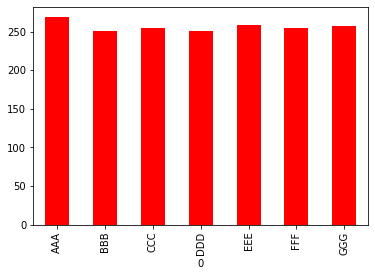

In [29]:
b.plot.bar(x=0,y=1, legend=0, color='red')

In [30]:
fin    = open(os.path.join("data","studentAssessment.csv"), "rt")
csv_in = csv.reader(fin)

In [31]:
fin    = open(os.path.join("data","studentInfo.csv"), "rt")
csv_in = csv.reader(fin)

In [32]:
fin    = open(os.path.join("data","studentRegistration.csv"), "rt")
csv_in = csv.reader(fin)

In [33]:
fin    = open(os.path.join("data","vle.csv"), "rt")
csv_in = csv.reader(fin)